### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [11]:
import pandas as pd
print(pd.__version__)

2.3.3


##### pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기

In [12]:
data = pd.read_csv('data/data_draw_korea.csv')
print(data.shape)
print(type(data))

(229, 8)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# head() 함수
data.head(3)

In [ ]:
# tail() 함수
data.tail()

In [ ]:
# sample() 함수
data.sample(4)

In [ ]:
# 컬렴명 확인하기
print(f'컬럼명 = {data.columns}')
# 인덱스 확인하기
print(f'인덱스 = {data.index}')

In [ ]:
# values 속성으로 값 확인하기
print(type(data.values))
data.values

In [ ]:
# info() 함수
data.info()

In [ ]:
# 모든 컬럼의 타입 확인
print(type(data['면적']))
data['면적']
data.dtypes

In [ ]:
# 면적 컬럼의 타입을 확인
print(type(data['면적']))
data['면적'].dtype

In [ ]:
# 특정컬럼(인구수)의 타입 확인
print(type(data['인구수']))
data['인구수'].dtype

In [ ]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력
data.describe()

In [ ]:
# numpy np.number 속성을 사용해서 describe()
import numpy as np
data.describe(include=np.number)

In [ ]:
# describe() 함수, 문자열(object) 타입인 컬럼의 통계함수 출력
data.describe(include=[object])

In [ ]:
# data['행정구역'] == '동구' 
data['행정구역'] == '동구'

In [ ]:
# 해당 조건식과 매칭되는 Row data 출력
data.loc[data['행정구역'] == '동구']

In [ ]:
# '광역시도' == '경기도'
data.loc[data['광역시도'] == '경기도'].reset_index(drop=True)

In [ ]:
# describe() 함수, 모든 컬럼(숫자, 문자 타입 모두)의 통계함수 출력
data.describe(include='all')

### Data Selection
* loc[] 또는 iloc[]
* loc[Row 선택, Column 선택]

In [ ]:
# 인구수 1개의 컬럼 선택(많이 사용하는 방식)
data['인구수']

In [ ]:
data.loc[:, '인구수']

In [ ]:
# ['행정구역','인구수','면적'] 컬럼의 데이터 출력
data[['행정구역', '인구수', '면적']]

In [ ]:
data.loc[0:10,['행정구역', '인구수', '면적']]

In [ ]:
# 인구수 컬럼의 집계함수
print(f"인구수 최대값 {data['인구수'].max():,}")
print(f"인구수 최소값 {data['인구수'].min():,}")
print(f"인구수 평균 {round(data['인구수'].mean()):,}")
print(f"인구수 표준편차 {round(data['인구수'].std()):,}")
print(f"인구수 중간값 {data['인구수'].median():,}")
data['인구수'].quantile([0.25, 0.75])

In [ ]:
# 인구수가 가장 많은 행정구역?
# 인구수의 최대값을 max_popu 변수에 저장
max_popu = data['인구수'].max()
#print(max_popu)
#data['인구수'] == max_popu
data.loc[data['인구수'] == max_popu]


In [ ]:
# 면적이 넓은 행정구역?
data.loc[data['면적'] == data['면적'].max()]


In [ ]:
# 인구수가 가장 적은 행정구역?
data.loc[data['인구수'] == data['인구수'].min()]

In [ ]:
# unique한 광역시도명
data['광역시도'].unique()

In [ ]:
# 광역시도별 Row Counting
data['광역시도'].value_counts()

In [ ]:
# data['광역시도'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터 출력하기
# 인구수가 많은 순서대로 정렬, 인덱스 재설정
data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True)

In [ ]:
#경기도에 속한 행정구역명, 인구수, 면적 선택하기 인구수를 descending 순서대로 출력하고 index reset 하여 gy_df 라는 변수에 저장하기
#data.loc[row , col]
gy_df = data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True)
gy_df

In [56]:

# 인구수2 라는 새로운 컬럼을 생성
gy_df['인구수2'] = gy_df['인구수'].map(lambda val:f"{val:,}")

In [ ]:
gy_df[['인구수', '인구수2']].head()

In [ ]:
# gy_df['면적2'] = gy_df['면적'].map('{:.2f}'.format())
#gy_df['면적2'] = gy_df['면적'].map(lambda val:f"{val:.2f}")
gy_df['면적2'] = gy_df['면적'].map('{:.2f}'.format)
gy_df[['면적','면적2']]

In [ ]:
# 면적이 > 1000 큰 조건과 매핑되는 새로운 DataFrame 생성 area_1000 라는 변수에 저장하기
# 컬럼명은 ['행정구역', '인구수', '면적']
area_1000 = data.loc[data['면적'] > 1000].copy()
area_1000

In [ ]:

# area_1000 DataFrame 객체에 면적2 컬럼을 생성 (3자리 단위로, 콤마가 표시된 값으로)
#area_1000['면적2'] = area_1000['면적'].map(lambda x: f"{x:,.3f}")
area_1000.loc[:,'면적2'] = area_1000['면적'].map('{:,}'.format)

In [ ]:
area_1000.loc[:,['면적', '면적2']].sort_values(by='면적', ascending=False)

In [ ]:
# 면적 컬럼의 값이 1500 이상 Row에만 면적 3이라는 새로운 칼럼의 값이 적용 되도록 하기
# 조건을 줬기 때문에 값이 1500 미만인 것들은 값이 Nan 값으로 채워짐
area_1000.loc[area_1000['면적'] >= 1500,'면적3'] = area_1000['면적'].map('{:,}'.format) 

In [ ]:
#경기도 인구수의 평균과 표준편차
area_1000.loc[:,['면적', '면적2','면적3']].sort_values(by='면적', ascending=False)

In [79]:
print(f"경기도 인구수 평균 = {gy_df['인구수'].mean()}")
print(f"경기도 인구수 편차 = {gy_df['인구수'].std()}")

경기도 인구수 평균 = 378845.48387096776
경기도 인구수 편차 = 304548.39514203876


In [93]:
#광역시도명을 인자로 받아서 해당 광역시에 속한 행정구역들의 인구수의 평균과 편차 구하기
def pop_mean_std(df, sido_name):
    print(f'==> {sido_name}의 인구수의 평균과 편차 <==')
    sido_df = df.loc[df['광역시도'] == sido_name, '인구수' : '행정구역'].copy() # 헹, 열
    #print(sido_df.shape)
    print(f"{sido_name} 인구수 평균 = {sido_df['인구수'].mean()}")
    print(f"{sido_name} 인구수 편차 = {sido_df['인구수'].std()}")  

In [ ]:
pop_mean_std(data, '서울특별시')

In [ ]:
# Unique한 광역시도명 순회하면서  광역시도명을 출력합니다. 
for sido_name in data['광역시도'].unique():
    pop_mean_std(data, sido_name)

In [ ]:
#loc[] 사용
#인덱스가 20 부터 25까지
data.loc[20:25]

In [ ]:
#iloc[] 사용
#인덱스가 20 부터 24까지
data.iloc[20:25]

In [ ]:
#iloc[row index, column index] 사용 
#인덱스가 20 부터 25까지 컬럼이 인구수부터 행정구역 까지
data.iloc[20:26, 1:8]

In [ ]:
data.columns

In [ ]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역
data.loc[[40, 55, 60], ['인구수', '광역시도', '행정구역']]

In [ ]:
#인덱스가 0인 행 하나만 선택
print(type(data.loc[0]))
data.loc[0]

In [ ]:
#열 하나만 선택
#print(type(data.loc[:,'행정구역']))
#print(data.loc[:,'행정구역'].head())
print(type(data['행정구역']))
print(data['행정구역'].head())

<class 'pandas.core.series.Series'>
0    강릉시
1    고성군
2    동해시
3    삼척시
4    속초시
Name: 행정구역, dtype: object


### 컬럼명 변경하기, 컬럼을 인덱스 전환하기
* rename() 함수
* inPlace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과만 출력한다.
* inPlace=True 원본 DataFrame객체를 변경하고, 변경한 결과는 출력하지 않는다.

In [137]:
data.columns

Index(['인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [ ]:
# 'Unnamed: 0' 컬럼명을 'seq' 로 변경한다. 원본 객체는 변경되지 않고 변경된 결과만 출력함
data.rename(columns={'Unnamed: 0' : 'seq'}, inplace=False)

In [134]:
#원본 객체가 변경되고 변경된 결과는 출력하지 않는다.
data.rename(columns={'Unnamed: 0' : 'seq'}, inplace=True)
print(data.columns)

Index(['인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')


In [141]:
# seq 컬럼을 인덱스로 변경한다, set_index(함수) 사용, inplace 속성이 동일하게 적용 
data.index.name

'seq'

In [133]:
data.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
seq,,,,,,,
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


### DataFrame을 Excel file로 저장하기
* 인구수가 평균보다 작은 행정구역, 광역시도, 인구수를 선택해서 DataFrame생성하기
* DataFrame의 to_excel() 함수 사용

In [ ]:
# 인구수의 평균값 구하기
pop_mean_value=data['인구수'].mean()
print(pop_mean_value)
print(round(pop_mean_value))
print(f'{pop_mean_value:.2f}')

In [140]:
# 인구수의 평균값보다 작은 Row를 선택하고, '광역시도','행정구역','인구수' 컬럼값을 가져오기
# 정렬할때 광역시도는 ascending으로 , 인구수는 descending
pop_mean_lt_df = data.loc[data['인구수'] < pop_mean_value, ['광역시도','행정구역','인구수']].sort_values(by=['광역시도', '인구수'], ascending=[True, False]).reset_index(drop=True)
print(pop_mean_lt_df.shape)

(141, 3)


In [142]:
# DataFrame의 to_excel() 함수를 사용하여 excel 파일로 저장
pop_mean_lt_df.to_excel('data/평균인구수미만행정구역.xlsx')

### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby(data['광역시도']) 함수는 컬럼의 값을 인자로 전달하고
* DataFrame 객체의 groupby('광역시도') 함수는 컬럼명을 인자로 전달합니다.

In [ ]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object
data['인구수'].groupby(data['광역시도']).sum()

In [ ]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object
data.groupby('광역시도').sum(numeric_only=True)

In [ ]:
# DataFrameGroupBy 
data.groupby('광역시도')['인구수'].sum()

In [ ]:
# 광역시도별 행정구역별 인구수의 합계
data.groupby(['광역시도', '행정구역'])['인구수'].sum(numeric_only=True)

In [160]:
# data/광역시도별행정구역별인구수의합계.xlsx 파일로 저장하기
group_df = data.groupby(['광역시도', '행정구역'])['인구수'].sum()
group_df.to_excel('data/광역시도별행정구역별인구수의 합계.xlsx', sheet_name='인구수합계')

### 엑셀 수치 데이터에 콤마찍기
[pandas.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [ ]:
%pip install xlsxwriter

In [163]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
group_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
num_format = workbook.add_format({'num_format': '#,###'})
worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
writer.close() #_save()

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [ ]:
#전국의 면적과 인구수의 상관계수 구하기
data['면적'].corr(data['인구수'])

In [ ]:
#서울의 면적과 인구수의 상관계수 구하기
seoul_df = data.loc[data['광역시도'] == '서울특별시', ['행정구역','인구수','면적']]
seoul_df['면적'].corr(seoul_df['인구수'])

In [ ]:
#경기도의 면적과 인구수의 상관계수 구하기
gy_df['면적'].corr(gy_df['인구수'])

In [ ]:
for sido_name in data['광역시도'].unique():
    print(f'{sido_name} 인구수와 면적간의 상관계수')
    sido_df = data.loc[data['광역시도'] == '서울특별시', ['행정구역','인구수','면적']]
    print(sido_df['면적'].corr(sido_df['인구수']))

#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','mean','std'])

In [181]:
# agg() 함수 사용하여 여러개의 통계함수를 사용합니다. 
# fillna(0) NaN 을 0 으로 변경해 줌
data.groupby('광역시도')['인구수'].agg(['max', 'mean', 'std']).fillna(0)

,max,mean,std
광역시도,,,
강원도,313851,79413.222222,87316.383238
경기도,1125461,378845.483871,304548.395142
경상남도,1010040,174693.722222,245796.465077
경상북도,488395,109085.391304,124954.740885
광주광역시,439683,287641.800000,137076.683206
대구광역시,584517,297306.250000,174375.394380
대전광역시,475094,293535.400000,111853.571882
부산광역시,397134,207724.437500,106246.041384
서울특별시,615487,375792.280000,125231.247975


In [ ]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기
group_agg_df = data.groupby('광역시도')['인구수'].agg(['max', 'mean', 'std']).fillna(0)
group_agg_df.sort_values(by='std', ascending=False)

In [ ]:
# DataFrame의 style.format() 함수 사용하기
group_agg_df.style.format('{0:.2f}')

In [ ]:
# 컬럼의 값을 변경하기 map() 함수를 사용하여 포맷하기
group_agg_df['mean'] = group_agg_df['mean'].map('{:.2f}'.format)
group_agg_df['std'] = group_agg_df['std'].map('{:.2f}'.format)
group_agg_df

#### 시각화
* %matplotlib inline 설정
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [1]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

In [ ]:
# 폰트이름과 폰트파일 정보 출력
for font in fm.fontManager.ttflist:
     print((font.name, font.fname))
# 폰트이름과 폰트파일 정보 출력 list comprehension
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Mal' in font.name] 


In [ ]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgunbd.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

In [7]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font', family=font_name)

### Figure, Axes, Plot
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간 : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* 비교) Axis는 X 축, Y축
* seaborn의 barplot() 함수(막대그래프) 사용

In [ ]:
seoul_df = data.loc[data['광역시도'] == '서울특별시', ['행정구역', '인구수', '면적']].reset_index(drop=True)
seoul_df

In [ ]:
# subplots() 함수를 사용하여 axes 객체를 생성하기
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1) # 2행 1열
figure.set_size_inches(18, 12)
print(figure)
print(axes1)
print(axes2) 

# seaborn의 barplot() 함수 호출하기 - 행정구역과 인구수
sns.barplot(data=seoul_df.sort_values(by='인구수', ascending=False), x='행정구역', y='인구수', ax=axes1, hue='행정구역')
# seaborn의 barplot() 함수 호출하기 - 행정구역과 면적
sns.barplot(data=seoul_df.sort_values(by='면적', ascending=False), x='행정구역', y='면적', ax=axes2, hue='행정구역')
#plt.show()



In [34]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    sido_df = data.loc[data['광역시도'] == sido_name].copy()
    figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1) # 2행 1열
    figure.set_size_inches(18, 12)
    
    pop_plot = sns.barplot(data=sido_df.sort_values(by='인구수', ascending=False), x='행정구역', y='인구수', ax=axes1, hue='행정구역')
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')

    area_plot = sns.barplot(data=sido_df.sort_values(by='면적', ascending=False), x='행정구역', y='면적', ax=axes2, hue='행정구역')
    area_plot.set_title(f'{sido_name} 행정구역별 인구수')
    

In [ ]:
show_pop_area('경기도')

In [ ]:
# 전국데이터의 광역시도의 인구수 , 검은선은 표준편차를 의미
figure, axes1 = plt.subplots(nrows=1, ncols=1) 
figure.set_size_inches(18, 12)

sns.barplot(data=data, x='광역시도', y='인구수', ax=axes1, hue='광역시도')

In [ ]:
print(type(seoul_df["인구수"]))
seoul_df["인구수"].items()

In [ ]:
for i, v in enumerate(seoul_df["인구수"].items()): # i: index, v: value
    #print(i, v)
    print(i, v[1])

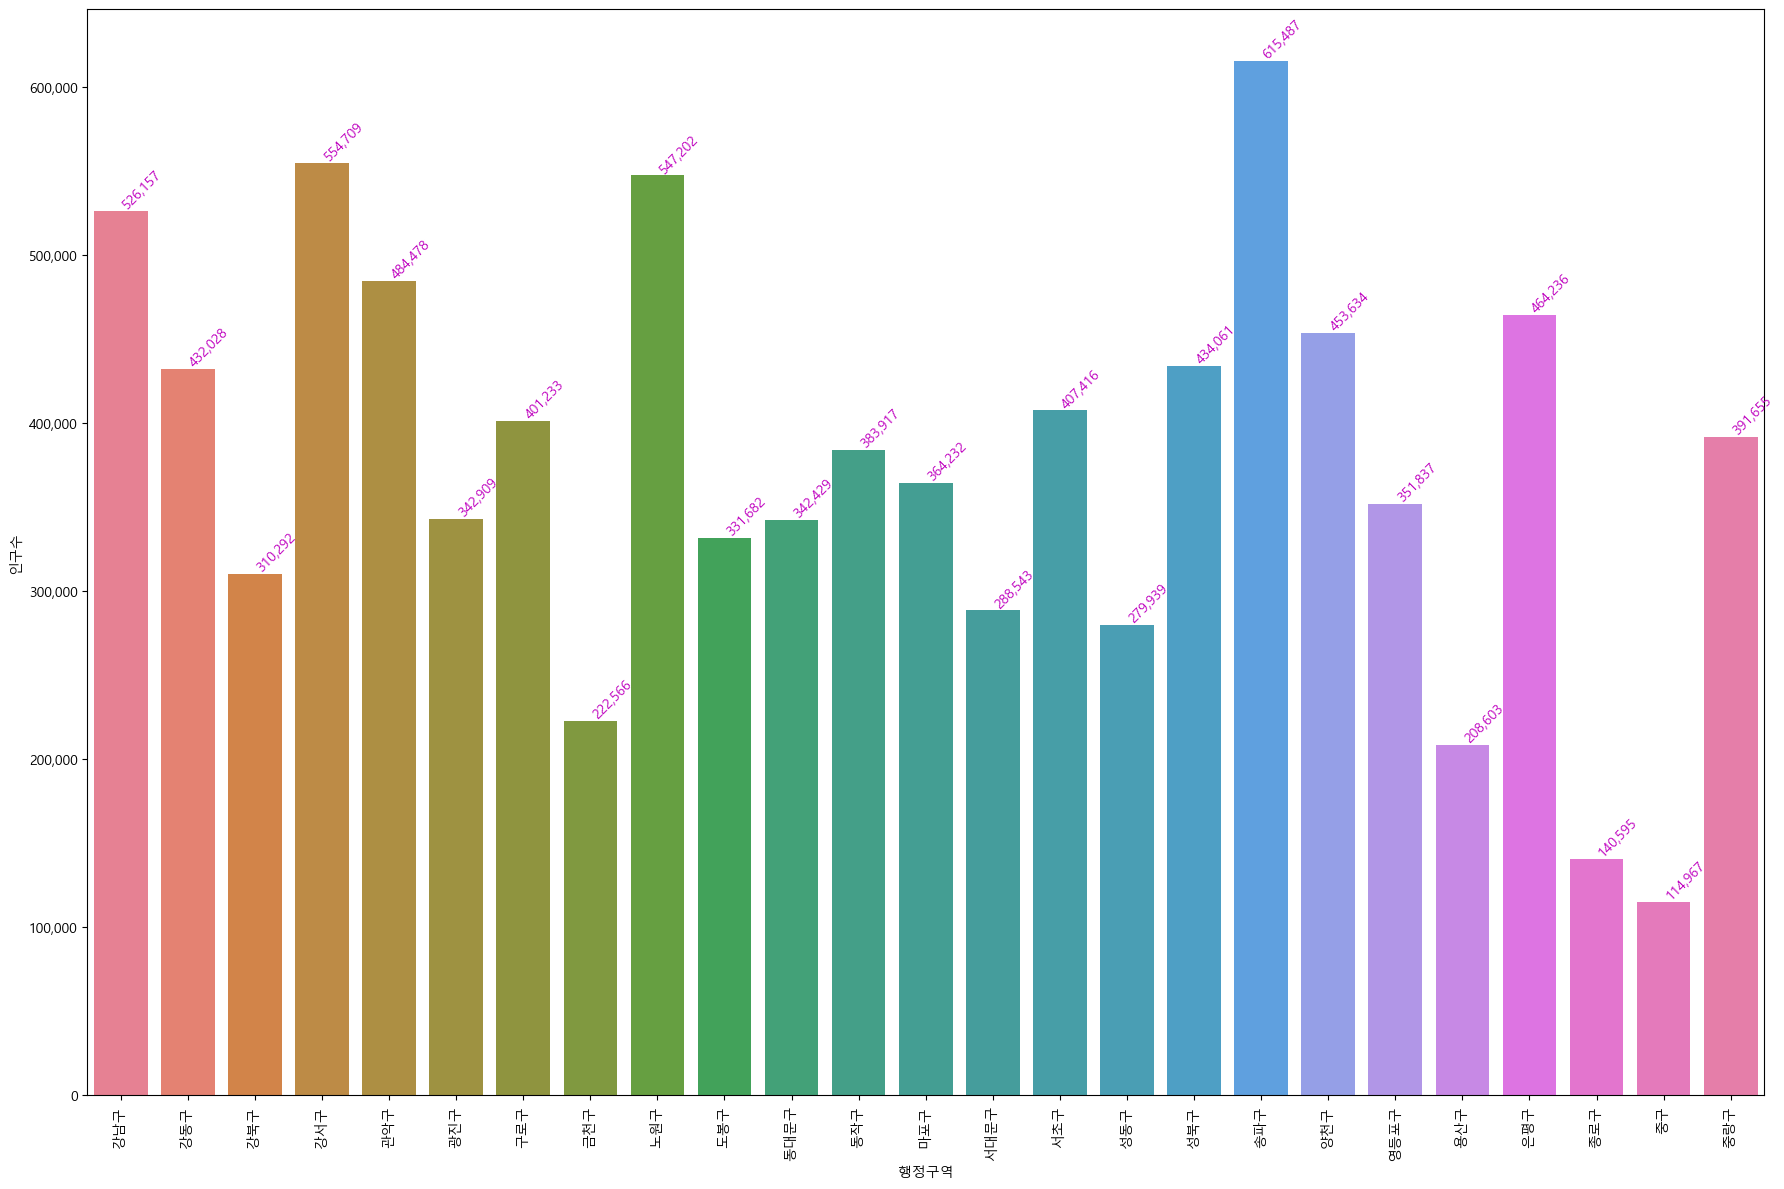

In [ ]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')

#y축의 label값에 ,(콤마) 출력하기
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


for item in ax1.get_xticklabels(): # 회전
    item.set_rotation(90)
for i, v in enumerate(seoul_df["인구수"].items()): # V[1] 인구수 수치
     ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
plt.tight_layout()